In [225]:
import numpy as np
import os
import pickle
from bayes_opt import BayesianOptimization
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
# import lsanomaly
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
np.random.seed(1)

In [226]:
with open("X_unet.pickle","rb") as f:
    scaler = pickle.load(f)
    X_without = pickle.load(f)
    X_without_val = pickle.load(f)
    X_with = pickle.load(f)

best_score = 0
best_params = None
best_model = None
y_val = None
y_test = None

In [227]:
y_without = np.zeros(X_without.shape[0])
y_without_val = np.zeros(X_without_val.shape[0])
y_with = np.ones(X_with.shape[0])

In [228]:
X = np.concatenate((X_without, X_without_val, X_with), axis=0)
y = np.concatenate((y_without, y_without_val, y_with), axis=0)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [230]:
# kbest = SelectKBest(k=X_train.shape[1])
# kbest.fit(X_train, y_train)

# scale = y_train[y_train==0].shape[0]/y_train[y_train==1].shape[0]

# clf = XGBClassifier(max_depth=15, n_estimators=300, scale_pos_weight=scale,
#                     tree_method='gpu_hist')
clf = LR(class_weight='balanced', max_iter=1000, tol=1e-8, n_jobs=15)
# clf.fit(kbest.transform(X_train), y_train)
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=15, tol=1e-08)

In [231]:
idx = np.random.randint(0, y_test[y_test==1].shape[0], y_test[y_test==1].shape[0])
idxs = np.concatenate((np.where(y_test==0)[0][idx], np.where(y_test==1)[0][idx]), axis=0)
score = accuracy_score(clf.predict(kbest.transform(X_test[idxs])), y_test[idxs])
score

0.6096866096866097

False positive rate:  0.37274453941120606


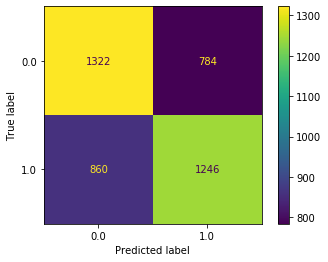

In [232]:
y_pred = clf.predict(kbest.transform(X_test[idxs]))
# tn, fp, fn, tp = confusion_matrix(y_test[idxs], y_pred).ravel()
plot_confusion_matrix(clf, kbest.transform(X_test[idxs]), y_test[idxs])
print("False positive rate: ", 785 / (1321 + 785))

In [233]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=1).fit(kbest.transform(X_train))
kmeans = KMeans(n_clusters=2, random_state=1).fit(X_train)

In [255]:
idx = np.random.randint(0, y_test[y_test==1].shape[0], y_test[y_test==1].shape[0])
idxs = np.concatenate((np.where(y_test==0)[0][idx], np.where(y_test==1)[0][idx]), axis=0)
# score = accuracy_score(kmeans.predict(kbest.transform(X_test[idxs])), y_test[idxs])
score = accuracy_score(kmeans.predict(X_test[idxs]), y_test[idxs])
score

0.4985754985754986

In [235]:
# y_pred = kmeans.predict(kbest.transform(X_test[idxs]))
y_pred = kmeans.predict(kbest.transform(X_test[idxs]))
tn, fp, fn, tp = confusion_matrix(y_test[idxs], y_pred).ravel()
print(tn, fp, fn, tp)
print("False positive rate: ", fp/(fp + tn))

NameError: name 'confusion_matrix' is not defined